# RNN

## Word Embeddings

Recall that Autoencoders can be used to learn an **embedding space**.

- Encoder: **data** --> embedding 
- Decoder: **embedding** --> data 

## Distance Measures

To describe words with similar embeddings, we need to introduce a **measure of distance** in the embedding space. 

### Euclidean Distance --> L2-norm on embeddings

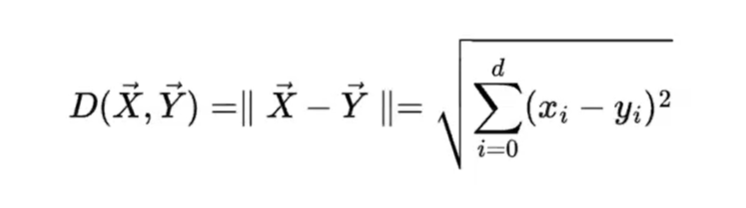

### Cosine Similarity --> Cosine of the angle between embeddings. 

Note this is **invariant/agnostic to magnitude**. This is not the case for euclidean distance.

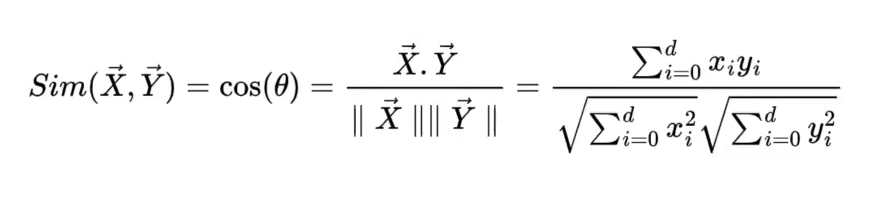

This is just a dot product normalized by the product of the vector lengths.

This is also just the cosine of the angles between the vectors. 

## Pytorch Implementation of Computing Distance

### Euclidean Distance

## Word Analogies

There are often interesting geometric relationships in the structure of GloVe embeddings. 

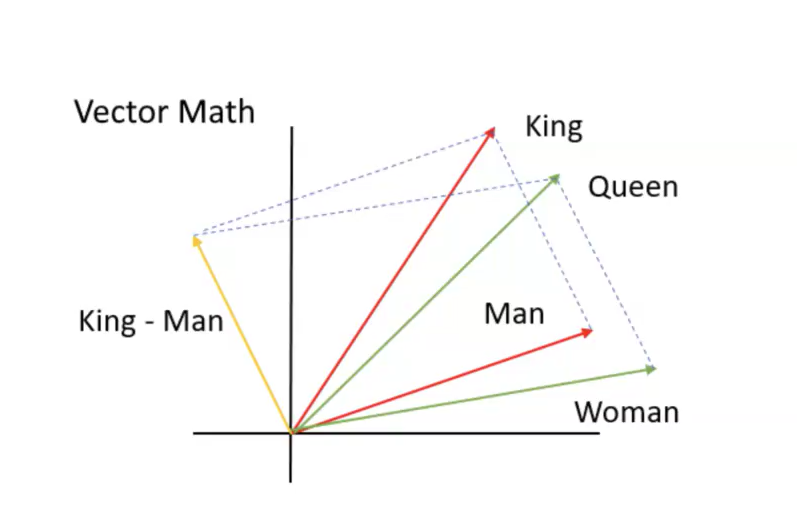

King - Man + Woman is approximately "Queen" 

This is lots of bias in Word Embeddings 

For example, doctor - man + woman often results in **nurse**. This is because the majority of data had these historical biases. 

## RNN - Recurrent Neural Networks

### Dataset: Sentiment140 

This dataset contains 1.6 million tweets. It's a binary classification of a happy or sad tweet. 

For each tweet in the training data, we will: 

1. Split the tweet into words 
2. Look up GloVe embedding for each words; ignoring words wihtout embeddings 
3. Add up the word embeddings to obtain an embedding for the ENTIRE tweet
4. The tweet embedding will be the INPUT to a fully-connected neural network 

This is similar to transfer learning! 

The embeddings are pretrained with wikipedia 

#### However! There is a limitation

This model does NOT take into account the order of words. 

"The food was adequate, but just not great" 

"The food was not just adequate, but great" 

This is a problem with aggregations

#### Idea 1

Let's not aggregate. 

Let's just concatenate this into GloVe embeddings and pass it into a FC Network 

However this is SO INEFFICIENT! 

This also does not consider variable lengths of text. We need to assume some kind of maximum length and do some kind of zero padding. 

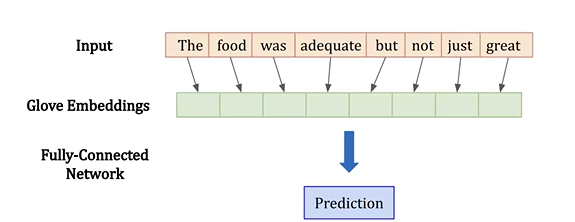

### Idea 2 - Maybe Convolution? 

Recall this is much more efficient than FC Layers

We can try to concatenate the word embeddings, then train a 1-dimensional CNN that takes the concatenated embedding as input. 

HOWEVER

Natural Languages have **long range dependencies**. 

"The cat that the dog chased ran away" 

The "ran" actually refers to "cat"

## Recurrent Neural Networks

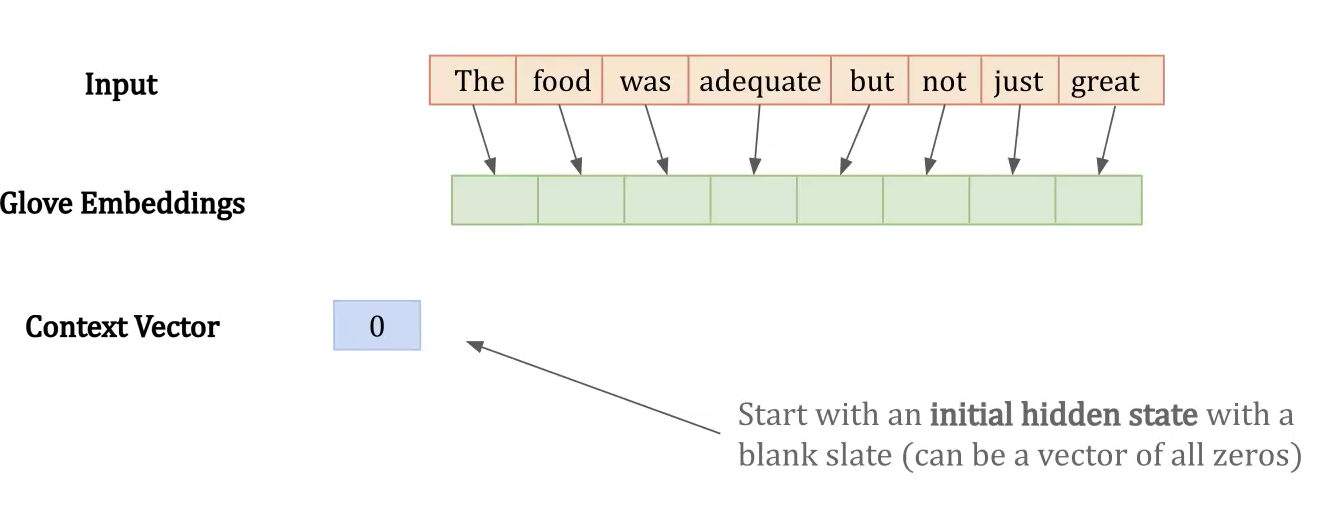

RNNs can take in **variable-sized** sequential input and has an EXTERNAL MEMORY

It starts with an **initial hidden state** with a blank slate. This can be a vector of ALL ZEROS!

$$
\text{hidden} = \text{update\_function(hidden, input)}

$$

This memory is just a vector. It starts as a **vector of zeros**


The hidden state is then updated based on previous hidden state and the INPUT. 

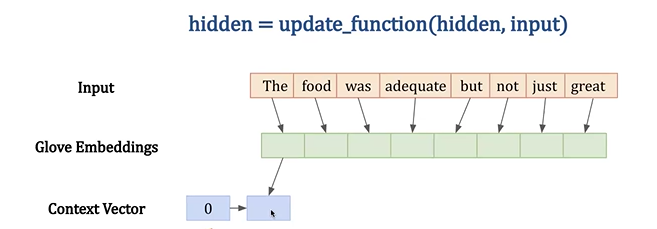

Word by word, the hidden state will get continuously updated. 


### Feature Extraction? 

Intuitively, that context vector at the end is a compression of the entire sequence. This can be passed into an FC to make a prediction.

### RNN Layer Architecture

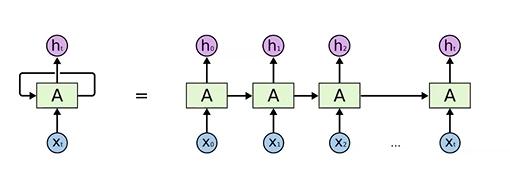

$$
h_t = {{\sigma}_h}({W_h}{x_t} + {U_h}{h_{t-1}} + b_h)
$$

$$
y_t = {{\sigma}_y({W_y}{h_t} + b_y)}
$$

This is basically one linear neural network. We have the linear layer ${W_h}{x_t}$ and adding a bias $b_h$. The only change now is having a second linear layer ${U_h}{h_{t-1}}$.

Then we just apply a nonlinearity like $\sigma$ or $tanh$

In [ ]:
rnn_layer = nn.RNN(input_size=50, hidden_size=64, batch_first=True)

$input\_size$ is the dimension of the **input token**, NOT the sequence length

$hidden\_size$ is the DIMENSION OF HIDDEN STATE

By default the input format is [sequence, batch, feature]

So then we adjust this to [batch, sequence, feature]

Then later on we just take 

self.fc(out[:, -1, :])

## Sentiment Analysis 

The problem of identifying the writer's sentiment given a piece of text. 

Sentiment140 is a dataset contianing tweest with eithe ra postivie or negative emoticon. The goal of this is to determine whether which type of emoticon the tweet contained. 

